In [1]:
from pylab import *
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
    })

plt.rc('text.latex', preamble=r'\usepackage[T1,T2A]{fontenc}\usepackage[utf8]{inputenc}\usepackage{cmsrb}\usepackage{amsmath,amsfonts,amssymb}\usepackage[Symbolsmallscale]{upgreek}\usepackage{icomma}')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


# Decimalni zarez
import locale
locale.setlocale(locale.LC_NUMERIC, "sr_RS.utf8")
plt.rcParams['axes.formatter.use_locale'] = True


def u(t):
    return (t > 0) * 1.0

In [2]:
def generate_canvas(w = 1.6, a = 1.618):
    fig = figure (figsize = (a*w, w), dpi = 200)
    xlim([-2,2])
    ylim([-2,2])
    minorticks_on()
    grid(b=True, which='major', color='0.45', linestyle='-')
    grid(b=True, which='minor', color='0.75', linestyle='--')

    return fig

def plot_dirac(x, A, lw = 1.5, c = 'k'):
    arrow(x, 0, 0, A, shape="full", color=c,linewidth=lw, head_width=0.2, head_length=0.3, length_includes_head=True, zorder=10)
    

In [3]:
def multiple_formatter(denominator=3, number=np.pi, latex=r'\uppi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\dfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$-\dfrac{%s}{%s}$'%(latex,den)
            elif num>1:
                return r'$\dfrac{%s%s}{%s}$'%(num,latex,den)
            elif num<-1:
                return r'$-\dfrac{%s%s}{%s}$'%(abs(num),latex,den)
                
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex=r'\uppi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/2646719972.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and gu

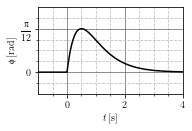

In [128]:
fig = generate_canvas()
ax = fig.gca()
ylim([-np.pi/24, 3*np.pi/24])
xlim([-1, 4])
xlabel(r"$t\,\rm[s]$")
ylabel(r"$\upphi\,\rm[rad]$")
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denominator=12)))
t = linspace(-1, 5, 1000)
phi = pi*e/6 * t * np.exp(-2*t)
plot(t,phi*u(t), 'k') 
plt.savefig( "BG_plot.pdf", bbox_inches="tight", ppad_inches="tight" )

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/1032758415.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("vrste_rl_1.pdf", bbox_inches='tight', ppad_inches=0)


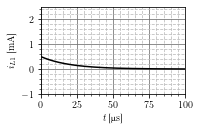

In [129]:
generate_canvas()
t = np.linspace(0, 100e-6,1000)
lam0 = -5e4
v = 0.5e-3 * exp(lam0*t)
plt.plot(t / 1e-6, v / 1e-3, 'k')
plt.xlabel(r'$t\,$[$\upmu$s]')
plt.ylabel(r'$i_{L1}\,$[mA]')
plt.ylim([-1, 2.5])
plt.xlim([0, 100])
plt.savefig("vrste_rl_1.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/4263483566.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("vrste_rl_2.pdf", bbox_inches='tight', ppad_inches=0)


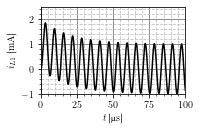

In [130]:
generate_canvas()
t = np.linspace(0, 100e-6,1000)
lam0 = -5e4
w = 1e6
v = 1e-3 * (exp(lam0*t) - cos(w*t))
plt.plot(t / 1e-6, v / 1e-3, 'k')
plt.xlabel(r'$t\,$[$\upmu$s]')
plt.ylabel(r'$i_{L1}\,$[mA]')
plt.ylim([-1, 2.5])
plt.xlim([0, 100])
plt.savefig("vrste_rl_2.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/1074139872.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("vrste_rl_3.pdf", bbox_inches='tight', ppad_inches=0)


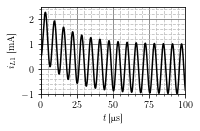

In [131]:
generate_canvas()
t = np.linspace(0, 100e-6,1000)
lam0 = -5e4
w = 1e6
v = 1e-3 * (exp(lam0*t) - cos(w*t)) + 0.5e-3*exp(lam0*t)
plt.plot(t / 1e-6, v / 1e-3, 'k')
plt.xlabel(r'$t\,$[$\upmu$s]')
plt.ylabel(r'$i_{L1}\,$[mA]')
plt.ylim([-1, 2.5])
plt.xlim([0, 100])
plt.savefig("vrste_rl_3.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


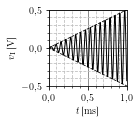

In [132]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-6, 1e-3,10000)
w0 = 1e5
xlim([0,1])
ylim([-0.5, +0.5])
plt.plot(t_ax/1e-3, -500 * t_ax*cos(w0*t_ax) * (t_ax >= 0.0), 'k', lw = 1   )
plt.plot(t_ax/1e-3, 500 * t_ax * (t_ax >= 0.0)  , 'k--', lw = 0.8 )
plt.plot(t_ax/1e-3, -500 * t_ax * (t_ax >= 0.0)  , 'k--', lw = 0.8 )
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$v_{\rm I}\,$[V]')
plt.savefig("LC_b.pdf", bbox_inches="tight")

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


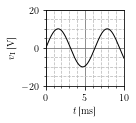

In [133]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-6, 10e-3,10000)
w0 = 1e3
xlim([0,10])
ylim([-20, +20])
plt.plot(t_ax/1e-3, 10 * sin(w0*t_ax) * (t_ax >= 0.0), 'k', lw = 1   )
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$v_{\rm I}\,$[V]')
plt.savefig("LC_a.pdf", bbox_inches="tight")

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


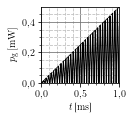

In [134]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-6, 1e-3,10000)
w0 = 1e5
xlim([0,1])
ylim([-0, +0.5])
plt.plot(t_ax/1e-3, 250 * t_ax*(1 + cos(w0*t_ax*2)) * (t_ax >= 0.0), 'k', lw = 1   )
plt.plot(t_ax/1e-3, 500 * t_ax * (t_ax >= 0.0)  , 'k--', lw = 0.8 )
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$p_{\rm g}\rm\,[mW]$')
plt.savefig("LC_v.pdf", bbox_inches="tight")

/tmp/ipykernel_8355/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_8355/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


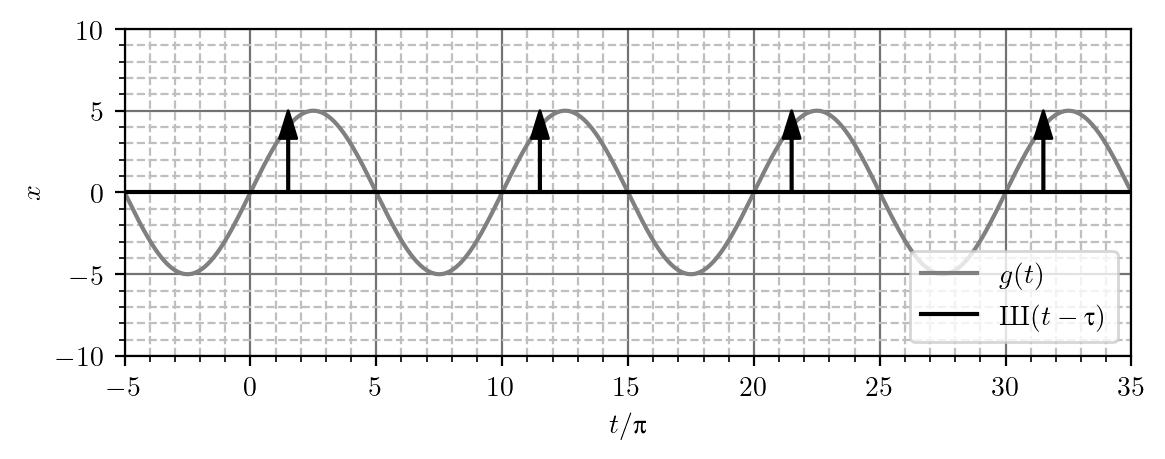

In [16]:

width = 165 / 25.4 # sirina
height = width / 3
a = width/height

fig = generate_canvas(w = height, a = a)
ax = fig.gca()
t = np.linspace(-20*pi, 40*pi,1000)
xs = 5*sin(t/5)
plt.plot(t/pi, xs, '0.5')
plt.xlabel(r'$t/\uppi$')
plt.ylabel(r'$x$')
#plt.ylim([-1, 2.5])
#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi*5))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denominator=1)))
plt.xlim([-5, 35])
plt.ylim([-10,10])
tau = 1.5
plot_dirac(tau, 5, lw = 0.5)
plot_dirac(tau + 10, 5, lw = 0.5)
plot_dirac(tau + 20, 5, lw = 0.5)
plot_dirac(tau + 30, 5, lw = 0.5)
plot_dirac(tau + 40, 5, lw = 0.5)
plt.plot(t/pi, 0*xs, 'k')

legend([r"$g(t)$", r"$\text{Ш}(t - \uptau)$"] , loc = 'lower right' )

#plt.savefig("delta_odabiranje_sin.pdf", bbox_inches='tight', ppad_inches=0)

In [15]:
def plot_dirac(x, A, lw = 1.5, c = 'k', annotation = ''):
    #arrow(x, 0, 0, A, shape="full", color=c,linewidth=lw, head_width=0.2, head_length=0.3, length_includes_head=True, zorder=10)
    annotate(annotation, [x,A], [x,0], arrowprops=dict(width=lw, headwidth=10/1.618, headlength=10, color = c))

In [43]:
f = 5
tau = 200e-3
theta0 = 25
Rm = 20

t = np.linspace(0, 10, 1000)
w = 2*pi*f
Pm = 1
n = 1/( sqrt( 4*(w*tau)**2 + 1  ))
psi = arctan(2*w*tau)

theta = theta0 + Pm*Rm*( 1-(1 + n*cos(psi))*exp(-t/tau) + n*cos(2*w*t + psi)  )

n

0.07932669684365852

/tmp/ipykernel_117575/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_117575/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_117575/3163012253.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("temperatura.pdf", bbox_inches='tight', ppad_inches=0)


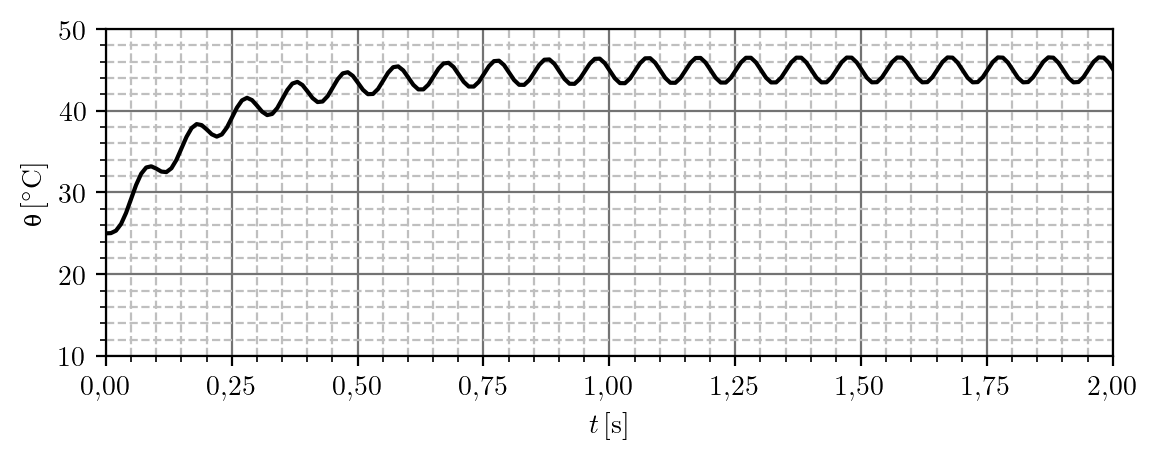

In [44]:

width = 165 / 25.4 # sirina
height = width / 3
a = width/height

fig = generate_canvas(w = height, a = a)

plt.plot(t, theta, 'k')

xlabel(r"$t\rm\,[s]$")
ylabel(r"$\uptheta\rm\,[^\circ C]$")
xlim(0, 2)
ylim(10, 50)
plt.savefig("temperatura.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_17434/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_17434/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


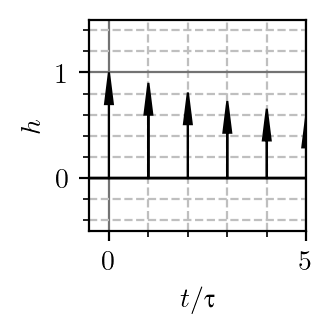

In [39]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-3, 10e-3,10000)
w0 = 1e3
xlim([-0.5, +5])
ylim([-0.5, +1.5])

for k in range(1, 10):
    plot_dirac( k-1 , 0.9**(k-1), lw = 0.75)

plt.plot(t_ax/1e-3, 0*t_ax, 'k', lw = 1   )
plt.xlabel(r'$t/\uptau$')
plt.ylabel(r'$h$')
plt.savefig("delay_s1.pdf", bbox_inches="tight")

/tmp/ipykernel_17434/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_17434/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


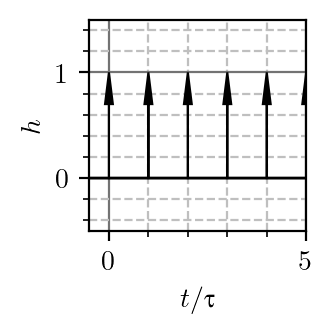

In [41]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-3, 10e-3,10000)
w0 = 1e3
xlim([-0.5, +5])
ylim([-0.5, +1.5])

for k in range(1, 10):
    plot_dirac( k-1 , 1**(k-1), lw = 0.75)

plt.plot(t_ax/1e-3, 0*t_ax, 'k', lw = 1   )
plt.xlabel(r'$t/\uptau$')
plt.ylabel(r'$h$')
plt.savefig("delay_s2.pdf", bbox_inches="tight")

/tmp/ipykernel_17434/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_17434/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


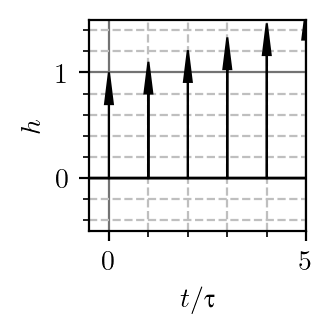

In [40]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-3, 10e-3,10000)
w0 = 1e3
xlim([-0.5, +5])
ylim([-0.5, +1.5])

for k in range(1, 10):
    plot_dirac( k-1 , 1.1**(k-1), lw = 0.75)

plt.plot(t_ax/1e-3, 0*t_ax, 'k', lw = 1   )
plt.xlabel(r'$t/\uptau$')
plt.ylabel(r'$h$')
plt.savefig("delay_s3.pdf", bbox_inches="tight")

/tmp/ipykernel_8355/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_8355/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_8355/4032899112.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("delay_resp.pdf", bbox_inches='tight', ppad_inches=0)


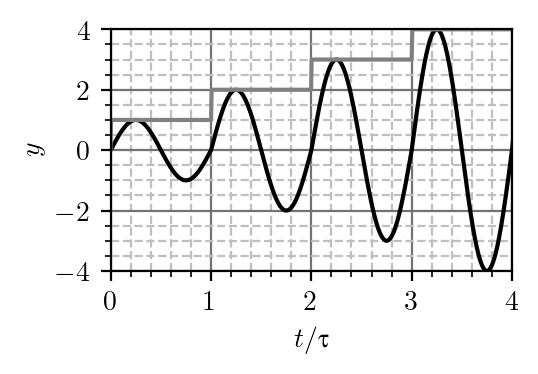

In [34]:
t = np.linspace(-1, 5, 1000)
def f(x):
    return sin(2*pi*x) * u(x)
x = f(t) + f(t-1) + f(t-2) + f(t-3) + f(t-4)
g = u(t) + u(t-1) + u(t-2) + u(t-3) + u(t-4)

generate_canvas()
lam0 = -5e4
plt.plot(t, x, 'k')
plt.plot(t, g, '0.5')
plt.xlabel(r'$t/\uptau$')
plt.ylabel(r'$y$')
plt.ylim([-4, 4])
plt.xlim([0, 4])
plt.savefig("delay_resp.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_8355/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_8355/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_8355/2659946048.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("probabilities.pdf", bbox_inches='tight', ppad_inches=0)


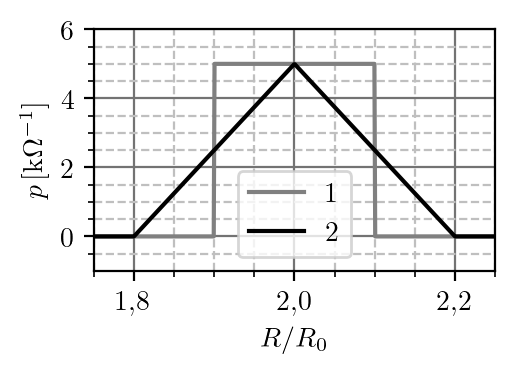

In [61]:
t = np.linspace(1.5, 2.5, 1000)
def f(x):
    return sin(2*pi*x) * u(x)
x = f(t) + f(t-1) + f(t-2) + f(t-3) + f(t-4)
g = u(t) + u(t-1) + u(t-2) + u(t-3) + u(t-4)

def rect(t):
    return (abs(t) < 0.5) * 1 + (abs(t)==0.5) * 0.5

def tri(t):
    return (1 - t) * ( (t > 0) * (t < 1) ) + (1 + t) * ( (t < 0) * (t > -1) ) 

R0 = 1

p = rect((t - 2)/(0.1*2)) / (0.1*2) 
psum =  tri((t - 2)/(0.1*2)) / (0.1*2)

generate_canvas()
lam0 = -5e4
plt.plot(t, p, '0.5')
plt.plot(t, psum, 'k')
#plt.plot(t, g, '0.5')
plt.xlabel(r'$R/R_0$')
plt.ylabel(r'$p\rm\,[k\Omega^{-1}]$')
plt.ylim([-1, 6])
plt.xlim([1.75, 2.25])
plt.legend([r"$1$", r"$2$"])
plt.savefig("probabilities.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_73061/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_73061/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_73061/455315876.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("stab.pdf", bbox_inches='tight', ppad_inches=0)


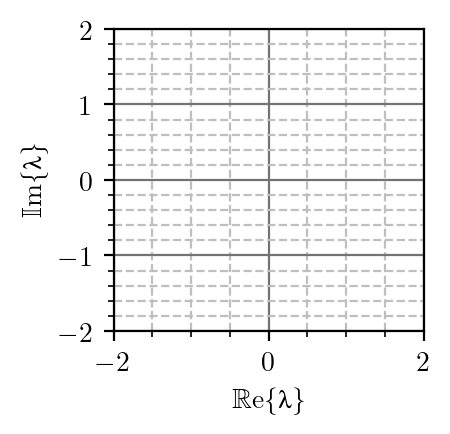

In [22]:
t = np.linspace(1.5, 2.5, 1000)
def f(x):
    return sin(2*pi*x) * u(x)
x = f(t) + f(t-1) + f(t-2) + f(t-3) + f(t-4)
g = u(t) + u(t-1) + u(t-2) + u(t-3) + u(t-4)

def rect(t):
    return (abs(t) < 0.5) * 1 + (abs(t)==0.5) * 0.5


generate_canvas(a = 1, w = 2)


lam0 = -5e4
#plt.plot(t, p, '0.5')
#plt.plot(t, psum, 'k')
#plt.plot(t, g, '0.5')
plt.xlabel(r'${\mathbb R}{\mathrm e}\{\uplambda\}$')
plt.ylabel(r'${\mathbb I}{\mathrm m}\{\uplambda\}$')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
#plt.legend([r"$1$", r"$2$"])
#plt.savefig("stab.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_19685/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_19685/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_19685/4172017257.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("comb_RLC_ss.pdf", bbox_inches='tight', ppad_inches=0)


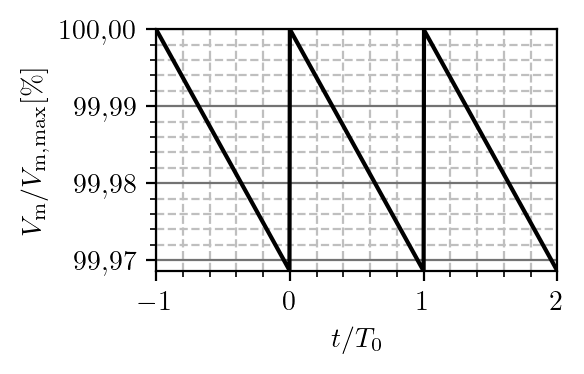

In [32]:
generate_canvas()

w = 1e6
sigma = -50
T0 = 2*pi/w

t = np.linspace(-T0, 2*T0,1000)

def V(t):
    while t < 0: t += T0
    while t > T0: t-=T0
    return exp(sigma*t);

y = [V(t)*100 for t in t]

plt.plot(t/T0, y, 'k')
plt.xlabel(r'$t/T_0$')
plt.ylabel(r'$V_\mathrm{m}/V_{\rm m,max} [\%]$')
plt.xlim([-1, 2])
plt.ylim([min(y), max(y)])
plt.savefig("comb_RLC_ss.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_19685/1212245559.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_19685/1212245559.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

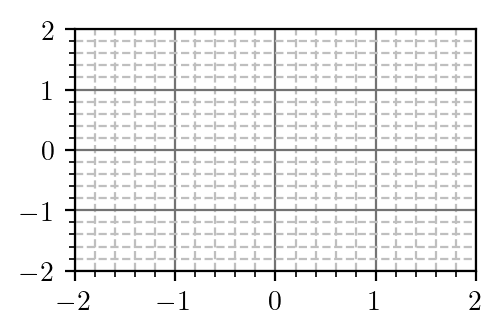

In [73]:
import matplotlib.pyplot as plt
w = 1.6
a = 1.618
fig, ax =  plt.subplots(1,1, sharex=True, figsize = (a*w, w), dpi = 200)
xlim([-2,2])
ylim([-2,2])
minorticks_on()
grid(b=True, which='major', color='0.45', linestyle='-')
grid(b=True, which='minor', color='0.75', linestyle='--')

w = 1e6
sigma = -50
T0 = 2*pi/w

t = np.linspace(1/sigma, -2/sigma, 1000)

def V1(t):
    if t < 0: return 0
    return exp(sigma*t)

def V2(t):
    if t < 0: return 0
    return -exp(sigma*t)


y1 = [V1(t) for t in t]
y2 = [V2(t) for t in t]


ax.fill_between(np.array(t), np.array(y1), np.array(y2))

plt.plot(t, y1, 'k')
plt.plot(t, y2, 'k')
plt.xlabel(r'$t/T_0$')
plt.ylabel(r'$V_\mathrm{m}/V_{\rm m,max} [\%]$')
plt.xlim([1/sigma, -2/sigma])
plt.ylim([min(y), max(y)])
plt.savefig("comb_RLC_impulse.pdf", bbox_inches='tight', ppad_inches=0)


/tmp/ipykernel_89379/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_89379/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_89379/2284476800.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("cconv_r1.pdf", bbox_inches='tight', ppad_inches=0)


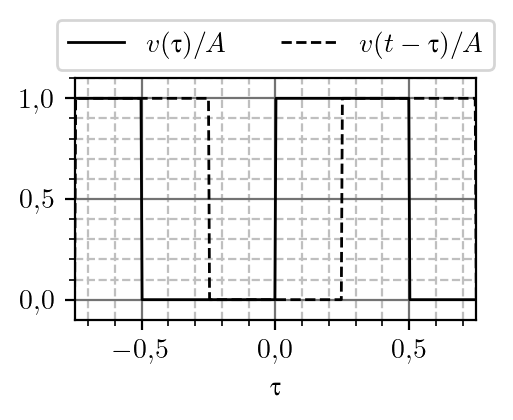

In [79]:

t = np.linspace(-2, 2, 1000)

def f(x):
    return sin(2*pi*x) * u(x)
x = f(t) + f(t-1) + f(t-2) + f(t-3) + f(t-4)
g = u(t) + u(t-1) + u(t-2) + u(t-3) + u(t-4)

def rect(t):
    while t < 0.5: t += 1;
    while t > 0.5: t -= 1;
    
    if t > 0: return 1
    return 0

R0 = 1

p = [rect(u) for u in t]
p2 = [rect(u-0.25) for u in t]
p3 = [rect(u)*rect(u-0.25) for u in t]
vec0 = [0 for u in t]


fig = generate_canvas()
lam0 = -5e4
plt.plot(t, p, 'k', lw=1)
plt.plot(t, p2, 'k--', lw=1)
#plt.plot(t, p3, 'k--', lw=1)
#plt.fill_between(t, vec0, p3, alpha=0.5)
#plt.plot(t, g, '0.')
plt.xlabel(r'$\uptau$')
plt.xlim([-0.75, 0.75])
plt.ylim([-0.1, 1.1])
plt.legend([r"$v(\uptau)/A$", r"$v(t-\uptau)/A$"], loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.savefig("cconv_r1.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_89379/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_89379/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_89379/2188208004.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("cconv_r2.pdf", bbox_inches='tight', ppad_inches=0)


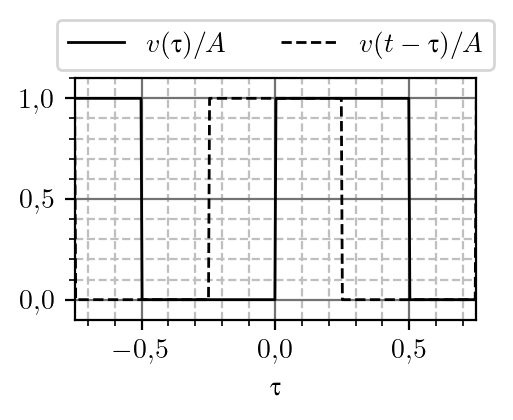

In [80]:

t = np.linspace(-2, 2, 1000)

def f(x):
    return sin(2*pi*x) * u(x)
x = f(t) + f(t-1) + f(t-2) + f(t-3) + f(t-4)
g = u(t) + u(t-1) + u(t-2) + u(t-3) + u(t-4)

def rect(t):
    while t < 0.5: t += 1;
    while t > 0.5: t -= 1;
    
    if t > 0: return 1
    return 0

R0 = 1

p = [rect(u) for u in t]
p2 = [rect(u+0.25) for u in t]
p3 = [rect(u)*rect(u+0.25) for u in t]
vec0 = [0 for u in t]


fig = generate_canvas()
lam0 = -5e4
plt.plot(t, p, 'k', lw=1)
plt.plot(t, p2, 'k--', lw=1)
#plt.plot(t, p3, 'k--', lw=1)
#plt.fill_between(t, vec0, p3, alpha=0.5)
#plt.plot(t, g, '0.')
plt.xlabel(r'$\uptau$')
plt.xlim([-0.75, 0.75])
plt.ylim([-0.1, 1.1])
plt.legend([r"$v(\uptau)/A$", r"$v(t-\uptau)/A$"], loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.savefig("cconv_r2.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_127388/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_127388/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_127388/2156093339.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("cconv_r3.pdf", bbox_inches='tight', ppad_inches=0)


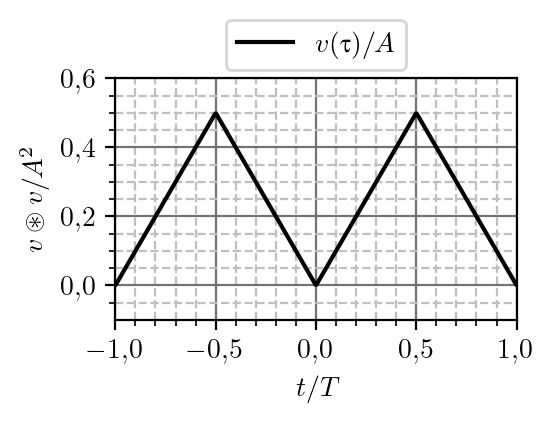

In [15]:

t = np.linspace(-2, 2, 1000)

def f(x):
    return sin(2*pi*x) * u(x)
x = f(t) + f(t-1) + f(t-2) + f(t-3) + f(t-4)
g = u(t) + u(t-1) + u(t-2) + u(t-3) + u(t-4)

def tri(t):
    while t < 0.5: t += 1;
    while t > 0.5: t -= 1;
    
    if t > 0: return t
    return -t

R0 = 1

p = [tri(u) for u in t]

fig = generate_canvas()
lam0 = -5e4
plt.plot(t, p, 'k', lw=1.5)
#plt.plot(t, p3, 'k--', lw=1)
#plt.fill_between(t, vec0, p3, alpha=0.5)
#plt.plot(t, g, '0.')
plt.xlabel(r'$t/T$')
plt.ylabel(r"$v\circledast v/A^2$")
plt.xlim([-1, 1])
plt.ylim([-0.1, 0.6])
plt.legend([r"$v(\uptau)/A$", r"$v(t-\uptau)/A$"], loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.savefig("cconv_r3.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_127388/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_127388/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


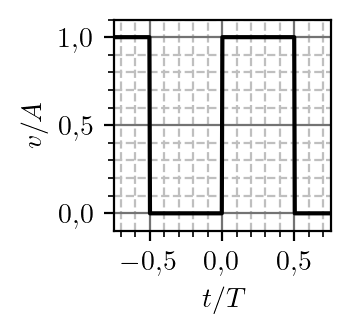

In [28]:
generate_canvas(w = 1.4, a = 1)
t = np.linspace(-2, 2, 1000)
w0 = 1e3
xlim([-0.75, 0.75])
ylim([-0.1, 1.1])


def rect(t):
    while t < 0.5: t += 1;
    while t > 0.5: t -= 1;
    
    if t > 0: return 1
    return 0

vrect = [rect(t) for t in t]

plt.plot(t, vrect, 'k', lw = 1.5   )
plt.xlabel(r'$t/T$')
plt.ylabel(r'$v/A$')
plt.savefig("cconv_setup.pdf", bbox_inches="tight")

/tmp/ipykernel_127388/2206181721.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_127388/2206181721.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


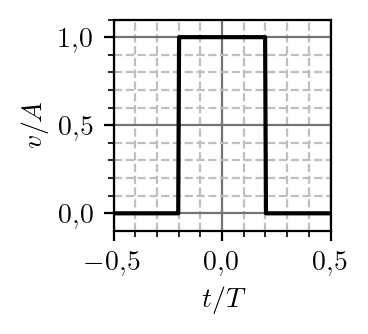

In [37]:
generate_canvas(w = 1.4, a = 1)
t = np.linspace(-2, 2, 1000)
w0 = 1e3
xlim([-0.5, 0.5])
ylim([-0.1, 1.1])


def rect(t):
    while t > 0.5: t -= 1;
    while t > 0.5: t -= 1;
    
    if abs(t) < 0.2: return 1
    return 0

vrect = [rect(t) for t in t]

plt.plot(t, vrect, 'k', lw = 1.5   )
plt.xlabel(r'$t/T$')
plt.ylabel(r'$v/A$')
plt.savefig("cconv_vezba.pdf", bbox_inches="tight")